In [1]:
from scipy.io import arff
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial import distance
import random

/Users/indraaristya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/indraaristya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/indraaristya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data_path = './data/1year.arff'
data_path2 = './data/2year.arff'
data_path3 = './data/3year.arff'
data_path4 = './data/4year.arff'
data_path5 = './data/5year.arff'

In [3]:
data, meta = arff.loadarff(data_path)
data2, meta2 = arff.loadarff(data_path2)
data3, meta3 = arff.loadarff(data_path3)
data4, meta4 = arff.loadarff(data_path4)
data5, meta5 = arff.loadarff(data_path5)

In [4]:
len(data)

7027

In [5]:
def euclidean(x1,x2):
     return distance.euclidean(x1, x2)
    
def knn(x_t,x):
    new_data = np.zeros(len(x))
    dist = []
    for i in range(len(x_t)):
        dist.append(euclidean(x,x_t[i]))
    indexSorted = np.argsort(dist)
    for i in range(0,len(x)):
        v = [x_t[indexSorted[0]][i],x_t[indexSorted[1]][i],x_t[indexSorted[2]][i],x_t[indexSorted[4]][i]]
        new_data[i] = np.mean(v)
    return new_data

def handle_imbalance(x_yes, x_no, y_yes):
    x = x_yes
    y = y_yes
    index = np.arange(len(x_yes))
    index = list(index)
    while len(x) < len(x_no)/2:
        idx = random.choice(index)
        x.append(knn(x_yes,x_yes[idx]))
        y.append(str(int(1)))
    return x,y

In [6]:
arr = np.array(data)
randomize = np.arange(len(arr))
np.random.shuffle(randomize)
arr = arr[randomize].tolist()

train_data = arr[:6000]
valid_data = arr[6000:7027]

x_train = []
y_train = []
x_valid = []
y_valid = []

In [7]:
for i in range(0,len(train_data)):
    y = np.array(train_data[i],dtype='float32')
    y = np.nan_to_num(y).tolist()
    y_train.append(str(int(y[64])))
    y.pop()
    x_train.append(y)
x_train = np.array(x_train)

for i in range(0,len(valid_data)):
    y = np.array(valid_data[i],dtype='float32')
    y = np.nan_to_num(y).tolist()
    y_valid.append(str(int(y[64])))
    y.pop()
    x_valid.append(y)
x_valid = np.array(x_valid)

In [8]:
x_train_yes = []
y_train_yes = []
x_train_no = []
y_train_no = []

for i in range(0, len(x_train)):
    if y_train[i] == '1':
        x_train_yes.append(x_train[i])
        y_train_yes.append(y_train[i])
    else:
        x_train_no.append(x_train[i])
        y_train_no.append(y_train[i])

In [9]:
im_x, im_y = handle_imbalance(x_train_yes,x_train_no,y_train_yes)

In [10]:
x_train_us = np.concatenate((x_train_no,im_x))
y_train_us = np.concatenate((y_train_no,im_y))

In [11]:
pca = PCA(n_components=30)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
x_train = pca.transform(x_train)
x_valid = pca.transform(x_valid)
x_train_us = pca.transform(x_train_us)

### SVM - Linear

In [13]:
# linear_clf = SVC(kernel='linear')
# linear_clf.fit(x_train, y_train)
# linear_predict_label = linear_clf.predict(x_valid)
# linear_acc = accuracy_score(y_valid, linear_predict_label)
# linear_f1 = f1_score(y_valid, linear_predict_label,
#                average='macro')
# linear_report = classification_report(y_valid, linear_predict_label, target_names=['0','1'])

In [14]:
# print("Acc: ",str(linear_acc*100),'%')
# print("F1: ",str(linear_f1*100),'%')
# print("==============================")
# print("Report")
# print(linear_report)

### SVM - RBF

In [15]:
# rbf_clf = SVC(kernel='rbf')
# rbf_clf.fit(x_train, y_train)
# rbf_predict_label = rbf_clf.predict(x_valid)
# rbf_acc = accuracy_score(y_valid, rbf_predict_label)
# rbf_f1 = f1_score(y_valid, rbf_predict_label,
#                average='macro')
# # rbf_report = classification_report(y_valid, rbf_predict_label, target_names=['0','1'])

In [16]:
# print("Acc: ",str(rbf_acc*100),'%')
# print("F1: ",str(rbf_f1*100),'%')
# print("==============================")
# print("Report")
# # print(rbf_report)

### SVM - Polynomial

In [17]:
# poly_clf = SVC(kernel='poly')
# poly_clf.fit(x_train, y_train)
# poly_predict_label = poly_clf.predict(x_valid)
# poly_acc = accuracy_score(y_valid, poly_predict_label)
# poly_f1 = f1_score(y_valid, poly_predict_label,
#                average='macro')
# poly_report = classification_report(y_valid, poly_predict_label, target_names=['0','1'])

In [18]:
# print("Acc: ",str(poly_acc*100),'%')
# print("F1: ",str(poly_f1*100),'%')
# print("==============================")
# print("Report")
# print(poly_report)

### k-NN

In [19]:
kx = np.arange(1,11)
acc_knns_us = []
for k in kx:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train_us, y_train_us) 
    knn_predict = neigh.predict(x_valid)

    cm_knn = confusion_matrix(y_valid, knn_predict)
    acc_knn = accuracy_score(y_valid, knn_predict)
    recall_knn = recall_score(y_valid, knn_predict,average='macro')
    precision_knn = precision_score(y_valid, knn_predict,average='macro')
    f1_knn = f1_score(y_valid, knn_predict,average='macro')
    print(str(k)," "," Acc: ",str(acc_knn), " || Precision: ",str(precision_knn)," || Recall: ",str(recall_knn)," || F1-Score: ",str(f1_knn))
    acc_knns_us.append(acc_knn*100)

1    Acc:  0.8636806231742941  || Precision:  0.49723132854200813  || Recall:  0.4940371124688844  || F1-Score:  0.490300899010238
2    Acc:  0.8987341772151899  || Precision:  0.5012474012474013  || Recall:  0.501765105227427  || F1-Score:  0.5005237560793117
3    Acc:  0.8471275559883155  || Precision:  0.5025988640017147  || Recall:  0.5065852002715546  || F1-Score:  0.4938583962456642
4    Acc:  0.866601752677702  || Precision:  0.5077193932827735  || Recall:  0.5167684996605567  || F1-Score:  0.5043104511264951
5    Acc:  0.8412852969814996  || Precision:  0.5270188435887756  || Recall:  0.5777438334464811  || F1-Score:  0.5250833368795835
6    Acc:  0.8558909444985394  || Precision:  0.5289107611548557  || Recall:  0.5747793618465716  || F1-Score:  0.5304475693843759
7    Acc:  0.8315481986368062  || Precision:  0.5270761576731726  || Recall:  0.5832541298936411  || F1-Score:  0.5229706835493337
8    Acc:  0.8432327166504382  || Precision:  0.5310573172266264  || Recall:  0.58936

In [21]:
print("Acc: ",str(max(acc_knns_us)),'%')
print("F1: ",str(max(acc_knns_us)),'%')
print("==============================")
print("Report")
print(classification_report(y_valid, knn_predict, target_names=['0','1']))

Acc:  89.87341772151899 %
F1:  89.87341772151899 %
Report
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       982
           1       0.09      0.31      0.14        45

   micro avg       0.83      0.83      0.83      1027
   macro avg       0.53      0.58      0.52      1027
weighted avg       0.93      0.83      0.87      1027



In [22]:
confusion_matrix(y_valid, knn_predict)

array([[840, 142],
       [ 31,  14]])

In [23]:
kx = np.arange(1,11)
acc_knns = []
for k in kx:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train) 
    knn_predict = neigh.predict(x_valid)

    cm_knn = confusion_matrix(y_valid, knn_predict)
    acc_knn = accuracy_score(y_valid, knn_predict)
    recall_knn = recall_score(y_valid, knn_predict,average='macro')
    precision_knn = precision_score(y_valid, knn_predict,average='macro')
    f1_knn = f1_score(y_valid, knn_predict,average='macro')
    print(str(k)," "," Acc: ",str(acc_knn), " || Precision: ",str(precision_knn)," || Recall: ",str(recall_knn)," || F1-Score: ",str(f1_knn))
    acc_knns.append(acc_knn*100)

1    Acc:  0.9104186952288218  || Precision:  0.4877091941070907  || Recall:  0.48667119257750624  || F1-Score:  0.48716891011723834
2    Acc:  0.952288218111003  || Precision:  0.4780058651026393  || Recall:  0.4979633401221996  || F1-Score:  0.48778054862842896
3    Acc:  0.9493670886075949  || Precision:  0.533944553590919  || Recall:  0.5070377913555103  || F1-Score:  0.5055185185185185
4    Acc:  0.9513145082765336  || Precision:  0.4779843444227006  || Recall:  0.4974541751527495  || F1-Score:  0.4875249500998004
5    Acc:  0.9493670886075949  || Precision:  0.47794117647058826  || Recall:  0.4964358452138493  || F1-Score:  0.487012987012987
6    Acc:  0.9532619279454723  || Precision:  0.47802734375  || Recall:  0.4984725050916497  || F1-Score:  0.48803589232303096
7    Acc:  0.9532619279454723  || Precision:  0.47802734375  || Recall:  0.4984725050916497  || F1-Score:  0.48803589232303096
8    Acc:  0.9552093476144109  || Precision:  0.4780701754385965  || Recall:  0.4994908350

/Users/indraaristya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/indraaristya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
print("Acc: ",str(max(acc_knns)),'%')
print("F1: ",str(max(acc_knns)),'%')
print("==============================")
print("Report")
print(classification_report(y_valid, knn_predict, target_names=['0','1']))

Acc:  95.61830574488802 %
F1:  95.61830574488802 %
Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       0.00      0.00      0.00        45

   micro avg       0.96      0.96      0.96      1027
   macro avg       0.48      0.50      0.49      1027
weighted avg       0.91      0.96      0.93      1027



/Users/indraaristya/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
confusion_matrix(y_valid, knn_predict)

array([[982,   0],
       [ 45,   0]])

### Perbandingan SVM Linear, RBF dan Polynomial

In [ ]:
# acc = [linear_acc, rbf_acc, poly_acc]
# f1 = [linear_f1, rbf_f1, poly_f1]

# objects = ('Linear', 'RBF', 'Polynomial')
# y_pos = np.arange(len(objects))
 
# plt.bar(y_pos, acc,align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Acc')
# plt.title('Perbandingan Nilai Akurasi')
 
# plt.show()

In [ ]:
# objects = ('Linear', 'RBF', 'Polynomial')
# y_pos = np.arange(len(objects))
 
# plt.bar(y_pos, f1 ,align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('F1')
# plt.title('Perbandingan Nilai F1')
 
# plt.show()

### Perbandingan Nilai Akurasi setiap k pada kNN

In [ ]:
max_idx = np.argsort(acc_knns)

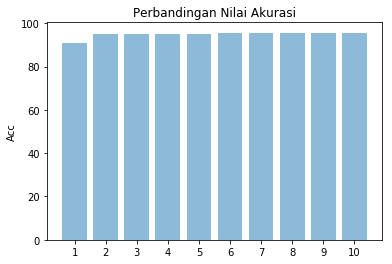

In [27]:
objects = np.arange(1,11)
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, acc_knns ,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Acc')
plt.title('Perbandingan Nilai Akurasi')
 
plt.show()

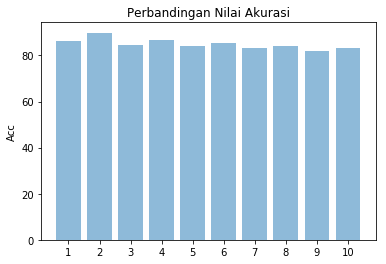

In [28]:
objects = np.arange(1,11)
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, acc_knns_us ,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Acc')
plt.title('Perbandingan Nilai Akurasi')
 
plt.show()

In [42]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predictions = mlp.predict(x_valid)
cm_mlp = confusion_matrix(y_valid, predictions)
acc_mlp = accuracy_score(y_valid, predictions)
recall_mlp = recall_score(y_valid, predictions,average='macro')
precision_mlp = precision_score(y_valid, predictions,average='macro')
f1_mlp = f1_score(y_valid, predictions,average='macro')
print("Acc: ",str(acc_mlp), " || Precision: ",str(precision_mlp)," || Recall: ",str(recall_mlp)," || F1-Score: ",str(f1_mlp))


Acc:  0.952288218111003  || Precision:  0.4780058651026393  || Recall:  0.4979633401221996  || F1-Score:  0.48778054862842896


In [43]:
from sklearn.neural_network import MLPClassifier
mlp_us = MLPClassifier()
mlp_us.fit(x_train_us,y_train_us)
predictions_us = mlp.predict(x_valid)
cm_mlp_us = confusion_matrix(y_valid, predictions_us)
acc_mlp_us = accuracy_score(y_valid, predictions_us)
recall_mlp_us = recall_score(y_valid, predictions_us,average='macro')
precision_mlp_us = precision_score(y_valid, predictions_us,average='macro')
f1_mlp_us = f1_score(y_valid, predictions_us,average='macro')
print("Acc: ",str(acc_mlp_us), " || Precision: ",str(precision_mlp_us)," || Recall: ",str(recall_mlp_us)," || F1-Score: ",str(f1_mlp_us))

Acc:  0.952288218111003  || Precision:  0.4780058651026393  || Recall:  0.4979633401221996  || F1-Score:  0.48778054862842896


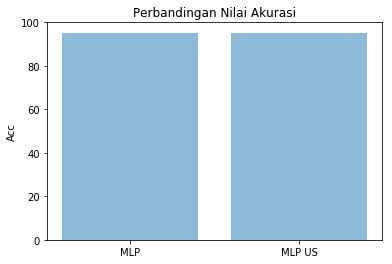

In [44]:
objects = ['MLP', 'MLP US']
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, [acc_mlp*100, acc_mlp_us*100] ,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Acc')
plt.title('Perbandingan Nilai Akurasi')
 
plt.show()